# **Parameter estimation of statistical distributions by the Maximum Likelihood Projections method based on the moment generating and characteristic functions**

Vadim Omelcenko, PhD.




**Abstract:**

This report is based on the paper: [Parameter estimation of sub-Gaussian stable distributions](https://eudml.org/doc/262151). It can be used as a complement to it because it demonstrates with Python code how it works. 

The methodology itself converges to the maximum likelihood estimation. Additionally, this method does not require an explicit form of the density function. This report demonstrates that this method is applicable to a broad class of distributions. It is enough to know the shape of the characteristic function or the moment generating function and to be able to calculate the partial derivative of the function with respect to the parameter of interest. And voila: the method produces the estimate of the parameter. 

An additional good feature of this method which was not mentioned in the paper is that the method is robust to the linear combinations of random variables:

If $X$ and $Y$ are random variables having the characteristic functions $\psi_X(t)$ and $\psi_Y(t)$, respectively, then their linear combination: $Z = aX+bY$ has the characteristic function:
$$\psi_Z(t)=\mathbb{E}\left[ \exp\left( i\cdot tZ \right)\right]=\psi_X(at)\cdot \psi_{Y}(bt).$$

In other words, **this method can work not only with challenging distributions, but also with their mixtures. It can handle a challenging distribution perturbed by another distribution**. 

And last but not least: this method is fast. The number observations boils down to taking a harmonic function of the input and calculating average values. In other words, this method can work with millions of observations. In this report, we also demonstrate how to store the calculated projections and apply them for the later use: this results in significant speedups.

This method was initially applied on the estimation of the tail index of stable and geometric stable distributions:


1.   The application of this method for the tail index of stable distributions $S_{\alpha}(1,0,0)$ is demonstrated [here](https://colab.research.google.com/drive/1k8VzxtVFgrVle6oHJ-kEhVDAskugqSIV).
2.   The application of this method for the tail index of geometric stable distributions $GS_{\alpha}(1,0,0)$ is demonstrated [here](https://colab.research.google.com/drive/1D7a7Y7qUhlmBxEJ_ChrJM0W4BjD6yA9I).





**The scope of this report**

The following distributions are considered:
- Normal inverse Gaussian (NIG): the parameter $\alpha$ is estimated
- Non-centrical chi-squared: the parameter $\lambda = \sum_{j=1}^k \mu^2$ is estimated  for fixed degrees of freedom $k$
- Gamma distribution: the scale parameter $\theta$ is estimated for fixed degrees of freedom $k$
- Normal/Gaussian distribution: the scale parameter $\sigma$ is estimated
- Laplace distribution: the scale $\sigma$ is estimated
- Gumbel distribution: the scale parameter $\beta$ is estimated.
- Stable distributions: the $\sigma$ parameter (scale index) is estimated while $\alpha$ is assumed to be known and $\beta = \mu = 0$.
- Geometric stable distributions: the $\sigma$ parameter (scale index) is estimated while $\alpha$ is assumed to be known and $\beta = \mu = 0$.
- The estimation of the scale index $\sigma$ of the random variable $Z$ where $$Z=X+Y,\quad X\sim S_{\alpha}(\sigma,0,0)\text{ and }Y\sim GS_{\alpha}(\sigma,0,0).$$

For all of the aforementioned distributions, the same framework is used. Therefore the estimated parameters will be notationally unified, and denoted **a** or **alpha** or $\alpha$. 

**The explanation of the method of projections**


The Fisher information $I(\alpha)$ of the parameter $\alpha$ is calculated as follows:

if $X$ is a random variable and $p(x,\alpha)$ is its density function, then
$$I(\alpha) = \int_{-\infty}^{+\infty}J^2(x, \alpha)p(x,\alpha)dx,$$
where $J(x,\alpha)=\frac{  \left( \frac{\partial p(x,\alpha)}{\partial \alpha} \right) }{p(x,\alpha)}$. 

For the sample $X_1, X_2, ..., X_n$, ***maximum likelihood*** estimate is obtained as follows:
$$\hat{\alpha}_{ML}=\left\{\alpha : \sum_{j=1}^{n} J(X_j, \alpha) = 0\right\}.$$

If a proper estimate of the function $J(x, \alpha)$ is found, it can be used for the estimation of the parameters. 

In the ***maximum likelihood projections*** method (MLP), the function $J(x,\alpha)$ is projected onto the space whose choice depends on the distribution. In the case of the stable and geometric stable distributions, $J(x, \alpha)$ was projected onto the space  $\{1, \exp(i\cdot t_1 x), \exp(i\cdot t_2 x), ..., \exp( i\cdot t_k x) \}$, and then the explicit form of the characteristic function is used: $$\psi(t) = \mathbb{E}\left( \exp\left( i\cdot t\cdot X\right)\right)$$

For stable distributions, the moment generating function is not defined. However, it is defined for Normal Inverse Gaussian distributions, Normal, Gumbel, etc. and can be used for the method of projections.

Thus, $J(x, \alpha)$ can be projected onto the space
$\{1, \exp( t_1 x), \exp(t_2 x), ..., \exp( t_k x) \}$, i.e.

\begin{align*}
J_k(x,\alpha) = \sum_{j=0}^{k}a_j \exp(t_jx) & \text{ for moment generating function} \\
J_k(x,\alpha) = \sum_{j=0}^{k}a_j \exp(i t_jx) & \text{ for characteristic function}
\end{align*}

where $t_0=0$, and $t_1,t_2,...,t_k$ are randomly chosen non-zero numbers that belong to the domain of the characteristic function. Their choice affects the quality of the estimates. We denote this finite and discrete set of points as follows:

$$\mathbf{T}=\{t_i, i=0,1,...,k \}.$$


The ability to easily calculate the moment generating function will be exploited in the MLP method. 

**Practical aspect**

If the moment generating function can be easier calculated than the characteristic function then the moment generating function should be used, and vice versa.




**The scalar product**

if $X\sim \omega_X(t)$ where $\omega_X(t)$ is the moment generating function, then the elements of the space are $$\{1, \exp(t_1 X), ...,\exp(t_k X) \}$$ 
where $t_0=0, t_1,t_2,...,t_n$ are random number that belong to the domain of $\omega(\cdot)$ and $\omega_{\alpha}(\cdot)$.

Thus for $1 \leq m,n \leq k$, the scalar product is defined
$$\langle \exp( t_m X), \exp( t_n X) \rangle =\mathbb{E}\exp(t_m X)\cdot \exp(t_n X)=$$
$$=\mathbb{E}\exp( (t_m + t_n)\cdot X) = \omega(t_m+t_n). $$

**The orthogonality**

The usage of orthogonal projections implies:
$$\langle (J_k(X,\alpha)-J(X,\alpha)), \exp(t_j X)\rangle = 0,\quad j=1,2,...,k.$$
which is equivalent to
$$\sum_{i=0}^{k}a_i\cdot \omega(t_i+t_j,\alpha) = \frac{\partial}{\partial \alpha}\omega(t_j,\alpha) = \omega_{\alpha}(t_j), \quad j=1,2,...,k.$$

This will be proven:

\begin{align*}
\langle (J_k(X,\alpha)-J(X,\alpha)), \exp(t_j X)\rangle &= 0 \\
\langle J_k(X,\alpha), \exp( t_j X)\rangle  &= \langle J(X,\alpha), \exp(t_j X)\rangle  \\
\text{Transform both parts of the last equality} &  \\
\text{The left part:} &  \\
\langle J_k(X,\alpha), \exp( t_j X)\rangle & = \left\langle \sum_{i=0}^{k}a_i \exp(t_iX), \exp( t_j X)\right\rangle = \\
= \sum_{i=0}^k a_i \langle \exp(t_i X), \exp(t_j X)\rangle & = \sum_{i=0}^k a_i \cdot \omega(t_i+t_j).\\
\text{The right part:} &  \\
\langle J(X,\alpha), \exp( t_j X)\rangle & = \int_{-\infty}^{\infty}J(x,\alpha)p(x,\alpha)\exp(t_jx)dx=\\
\int_{-\infty}^{\infty} \frac{\left(  \frac{\partial p(x,\alpha)}{\partial \alpha} \right)}{p(x,\alpha)}p(x,\alpha)\exp(t_jx)dx & = \int_{-\infty}^{\infty} \frac{\partial p(x,\alpha)}{\partial \alpha} \exp(t_jx)dx = \\
\frac{\partial }{\partial \alpha}\int_{-\infty}^{\infty} p(x,\alpha) \exp(t_jx)dx  & = \frac{\partial }{\partial \alpha}\omega(t_j) = \omega_{\alpha}(t_j).  
\end{align*}
The order of the integration and partial derivative can be reversed because of the Leibnitz rule and the fact that $p(x,\alpha)\geq 0$.

If $A(\alpha) = \{\omega(t_i+t_j),\quad i,j=0,1,..,k\}$ and $b(\alpha)=\{0\}\cup \{ \omega_{\alpha}(t_j),\quad j=1,2,..,k \}$, then
$$J_k(x,\alpha) = \left( (A(\alpha))^{-1}\cdot b(\alpha) \right)^{\top} F(\mathbf{T}, X_j),$$
where $F(\mathbf{T}, X)=\{1, \exp( t_1 X), \exp( t_2 X), ..., \exp( t_k X) \}$, and $T=\{t_0,t_1,...,t_k\}$.



$$$$
$$$$

The corresponding system of equations in this formulation is 
$$\sum_{i=0}^{k}a_i \omega(t_i+t_j,\alpha) = \omega_{\alpha}(t_j), \quad j=1,2,...,k., \quad j=1,2,...,k,$$
and $F(\mathbf{T}, X)=\{1, \exp( t_1 X), \exp( t_2 X), ..., \exp( t_k X) \}$.

**Implementation in code:**



\begin{align*}
J^*_k(x,\alpha) &= a^*_0 + \sum_{j=1}^{k}a_j\exp(t_j x) \\
F(\mathbf{T}, X) &= \{1, \exp( t_1 X), \exp( t_2 X), ..., \exp( t_k X) \}\\
A(\alpha) & =  \{\omega(t_i+t_j),\quad i,j=0,1,..,k\} \\
b(\alpha) & = \{0\}\cup \{ \omega_{\alpha}(t_j),\quad j=1,2,..,k \}\\
\mathbf{Hence} & \\
J^*_k(x,\alpha) &= a^*_0 + \sum_{j=1}^{k}a_j\exp(t_j x) =  \left( (A(\alpha))^{-1}\cdot b(\alpha) \right)^{\top} F(\mathbf{T}, x) \\
\sum_{j=1}^{n}J^*_k(X_m,\alpha)& = \left( (A(\alpha))^{-1}\cdot b(\alpha) \right)^{\top} \sum_{m=1}^{n}F(\mathbf{T}, X_m) \\
\mathbf{Finally} & \\
 \hat{\alpha}_{MLP}& =\mathrm{agrmin}_{\alpha}\left| \left( (A(\alpha))^{-1}\cdot b(\alpha) \right)^{\top} \frac{1}{n}\sum_{m=1}^{n}F(\mathbf{T}, X_m) \right|
\end{align*}

**Specification of the shape of the moment generating and characteristic functions. The parameter of interest is in all the cases denoted as $\alpha$ for the sake of consitency in notation**

In this notebook six families of distributions are considered, and their moment generating functions are as follows where the $\alpha$ parameter is what is estimated:

- The moment generating function of $NIG(\alpha, 0, 1, 0)$ is $$\omega(t;\alpha) = \exp\left( \alpha - \sqrt{\alpha^2 - t^2} \right)$$
- The moment generating function of the non-centrical chi-squared distribution $\chi^2_k(\alpha)$ is $$\omega(t;\alpha,k) = \frac{ \exp\left( \frac{\alpha t}{1-2t} \right) }{(1 - 2t)^{k/2}}\text{ for }t<\frac{1}{2}$$
- The moment generating function of the gamma distribution $\gamma(\alpha, k)$ is $$\omega(t,\alpha, k)=\frac{1}{(1-\alpha t)^k}\text{ for }t<\frac{1}{\alpha}$$.
- The moment generating function of the normal distribution $N(0, \alpha)$ is $$\omega(t, \alpha)=\exp\left( \frac{\alpha^2 t^2}{2} \right)$$
- The moment generating function of the Laplace distribution $\mathrm{Laplace}(0, \alpha)$ is $$\omega(t, \alpha)=\frac{1}{1-\alpha^2 t^2}$$
- The moment generating function of the Gumbel distribution $\mathrm{Gumbel}(0, \alpha)$ is $$\omega(t, \alpha)=\Gamma(1-\alpha t)$$

We also estimate the scale parameter of $S_{\mathrm{tail\_index}}(\alpha,0,0)$ and $GS_{\mathrm{tail\_index}}(\alpha,0,0)$ where the tail index $\alpha$ is assumed to be known. We also estimate the tail index of the mixture
$$Z=X+Y,\quad X\sim S_{\mathrm{tail\_index}}(\sigma,0,0)\text{ and }Y\sim GS_{\mathrm{tail\_index}}(\sigma,0,0).$$

The denoting the tail index as $\gamma$ the corresponding characteristic functions are as follows:
- The characteristic function of the symmetric stable distribution is
$$\psi(t,\alpha)=\exp\left( -\alpha^\gamma |t|^{\gamma} \right)$$
- The characteristic function of the geometric stable distribution is
$$\psi(t,\alpha)= \frac{1}{1+\alpha^\gamma |t|^{\gamma}} $$
- The characteristic function of the mixture $Z=X+Y,\quad X\sim S_{\gamma}(\sigma,0,0)\text{ and }Y\sim GS_{\gamma}(\sigma,0,0)$ is
$$\psi(t) = \psi_{\mathrm{stable}}(t)\times \psi_{\mathrm{geom\_stable}}(t)=\exp\left( -\alpha^\gamma |t|^{\gamma} \right)\times \frac{1}{1+\alpha^\gamma |t|^{\gamma}}.$$

$$$$

$$$$
**Linear Combinations of independent distributions**

Let us assume that $X\sim \psi_X(t)$, $Y \sim \psi_{Y}(t)$, and $X, Y$ are independent. Then $Z = X+Y\sim \psi_X(t)\cdot \psi_{Y}(t)$ because
$$\psi_Z(t)=\mathbb{E}\left[ \exp\left( \mathbb{i}tZ \right)\right]=\mathbb{E}\left[ \exp\left( \mathbb{i}t(X+Y) \right)\right]=\mathbb{E}\left[ \exp( \mathbb{i}tX)\exp(\mathbb{i}tY)\right]=\mathbb{E}\left[ \exp( \mathbb{i}tX)\right]\mathbb{E}\left[\exp(\mathbb{i}tY)\right]=\psi_X(t)\cdot \psi_{Y}(t)$$

For the linear combination $Z = a\cdot X + b\cdot Y$, holds:
$$\psi_Z(t)=\mathbb{E}\left[ \exp\left( \mathbb{i}tZ \right)\right]=\mathbb{E}\left[ \exp\left( \mathbb{i}t(aX+bY) \right)\right]=\mathbb{E}\left[ \exp( \mathbb{i}(ta)X)\right]\mathbb{E}\left[\exp(\mathbb{i}(tb)Y)\right]=\psi_X(at)\cdot \psi_{Y}(bt)$$

For the moment generating function $\omega$, the result is analogous:
if $X\sim \omega_X(t)$, $Y \sim \omega_{Y}(t)$, and $X, Y$ are independent. Then $Z = X+Y\sim \omega_X(t)\cdot \omega_Y(t)$, and for a linear combination $Z = a\cdot X + b\cdot Y$, holds:
$$\omega_Z(t)=\mathbb{E}\left[ \exp\left( tZ \right)\right]=\omega_X(at)\cdot \omega_{Y}(bt).$$


In [ ]:
# importing the packages that will be used in this code
import numpy as np               # for the operations with matrices and vectors
import matplotlib.pyplot as plt  # for visualizations
from sympy import symbols, diff, exp, lambdify, simplify, gamma, polygamma
from scipy.stats import norminvgauss, levy_stable


In [ ]:
fun = np.vectorize(lambda x: np.sin(x))

In [ ]:
# The functions used for generating samples
def S_nig(xa, N):

    sample = norminvgauss.rvs(xa, 0, size=N)
    return sample

def S_chi(xa, K_sum, N):
    SAMPLE = []
    for n in range(N):
        sample = np.random.normal(loc=0, scale=1, size=K_sum)
        sample[0] = sample[0] - np.sqrt(xa)
        y = sum(sample**2)
        SAMPLE.append(y)
    return np.array(SAMPLE)

def S_gamma(xa, K_sum, N):
    gamma_values = np.random.gamma(shape=K_sum, scale=xa, size=N)
    return gamma_values

def S_normal(xa, N):
    return xa*np.random.normal(loc=0, scale=1, size=N)

def S_laplace(xa, N):
    sample = np.random.laplace(0, xa, N)
    return sample

m = 1
def S_gumbel(xa, N):    
    s = xa
    u = np.random.rand(N)
    # Apply inverse of CDF to obtain Gumbel distributed variables
    x = m - s*np.log(-np.log(u))
    return x

def S_geom_stable(xa, al, N):
    Z = np.random.exponential(scale=1, size=N)
    Z = np.power(Z, 1/al)
    X = xa*levy_stable.rvs(al, 0, size=N)
    X = X * Z
    return X

def S_stable(xa, al, N):
    X = xa*levy_stable.rvs(al, 0, size=N)
    return X

def S_hybrid(xa, al, N):
    return S_geom_stable(xa, al, N) + S_stable(xa, al, N)

$$$$
$$$$
$$$$
$$$$
$$$$
$$$$
$$$$

In [ ]:
"""The following function takes the shape of the moment generating function 
and produces all the needed for the method of projections using 
sympy's function lambdify"""
def transformation_MGF(fun_mgf):
    x, a = symbols('x a')
    df_fun_cf = diff(fun_mgf, a)

    numpy_exp = np.exp

    fun_mgf    = lambdify((a, x), fun_mgf,    modules={"exp": numpy_exp, \
                                                       "gamma": gamma})
    df_fun_cf = lambdify((a, x), df_fun_cf, modules={"exp": numpy_exp, \
                                                     "gamma": gamma, \
                                                     "polygamma": polygama0})

    fun_cf_vect = np.vectorize(lambda x, a: fun_mgf(x, a))
    df_fun_cf_vect = np.vectorize(lambda x, a: df_fun_cf(x, a))

    def A(a, T):
        n = len(T)
        A, B = np.meshgrid(T, T)
        matrix = fun_cf_vect(a, A + B) 
        return matrix

    def B(T, a):  
        T = np.array(T, dtype=np.float64)
        T[T == 0] = np.finfo(np.float64).eps
        y = df_fun_cf_vect(T, a) 
        return y

    def F(X, T):
        X1 = np.outer(X, T)
        Y1 = np.exp(X1)
        FX = np.mean(Y1, axis=0)
        return FX

    def projection(FX, T, a):
        A0 = A(a, T)
        A0 = A0.astype(np.float64)
        return abs(np.dot(np.dot(np.linalg.inv(A0), B(a, T)), FX))

    def A_inv(a, T):
        A0 = A(a, T)
        A0 = A0.astype(np.float64)
        return np.linalg.inv(A0)

    def projection_vector(a, T):
        A0 = A_inv(a, T)
        b0 = B(a, T)
        return np.dot(A0, b0)

    def fi_2(a, T):
        A0 = A_inv(a, T)
        b0 = B(a, T)
        return np.dot(np.dot(A0, b0),b0)

    def fisher_info(T, a):
        return abs(np.dot(np.dot(np.linalg.inv(A(a, T)), B(a, T)), B(a, T)))

    return A, B, F, projection, fisher_info, A_inv, projection_vector, fi_2

In [ ]:
""" The following function takes the shape of the characteristic function and produces all the needed 
for the method of projections using sympy's function lambdify """
def transformation_CF(fun_mgf):
    x, a = symbols('x a')
    df_fun_cf = diff(fun_mgf, a)
    numpy_exp = np.exp

    fun_mgf    = lambdify((a, x), fun_mgf,    modules={"exp": numpy_exp, \
                                                       "gamma": gamma})
    df_fun_cf = lambdify((a, x), df_fun_cf, modules={"exp": numpy_exp, \
                                                     "gamma": gamma, \
                                                     "polygamma": polygama0})
    fun_cf_vect = np.vectorize(lambda x, a: fun_mgf(x, a))
    df_fun_cf_vect = np.vectorize(lambda x, a: df_fun_cf(x, a))

    def A(a, T):
        n = len(T)
        A, B = np.meshgrid(T, T)
        matrix = fun_cf_vect(a, A + B) + fun_cf_vect(a, A - B) 
        matrix = np.real_if_close(matrix)
        return matrix

    def B(T, a):  
        T = np.array(T, dtype=np.float64)
        T[T == 0] = np.finfo(np.float64).eps
        y = df_fun_cf_vect(T, a) 
        return y

    def F(X, T):
        X1 = np.outer(X, T)
        Y1 = np.cos(X1)
        FX = np.mean(Y1, axis=0)
        return 2*FX

    def projection(FX, T, a):
        A0 = A(a, T)
        A0 = A0.astype(np.float64)
        return abs(np.dot(np.dot(np.linalg.inv(A0), B(a, T)), FX))

    def A_inv(a, T):
        A0 = A(a, T)
        A0 = A0.astype(np.float64)
        return np.linalg.inv(A0)

    def projection_vector(a, T):
        A0 = A_inv(a, T)
        b0 = B(a, T)
        return np.dot(A0, b0)

    def fi_2(a, T):
        A0 = A_inv(a, T)
        b0 = B(a, T)
        return np.dot(np.dot(A0, b0),b0)

    def fisher_info(T, a):
        return abs(np.dot(np.dot(np.linalg.inv(A(a, T)), B(a, T)), B(a, T)))

    return A, B, F, projection, fisher_info, A_inv, projection_vector, fi_2

In this report straightforward search is used instead of binary search. The latter provides better precision by diving the interval into two parts, but it works if the error function is convex. In some situations, the error function is not convex as is demonstrated in the estimation of the tail index: [The notebook with the estimation of the tail index](https://colab.research.google.com/drive/1k8VzxtVFgrVle6oHJ-kEhVDAskugqSIV)

If the error function is not convex, then the binary search produces wrong results. In this report only straightforward search is applied, but in further research, binary search can also be used after exploring the features of the error function.

In [ ]:
# straightforward search function and a function for print statements
def straightforward_search(fun, start_alpha, end_alpha):
    Alpha = np.linspace(start_alpha, end_alpha, 20)
    #Alpha = list(np.arange(start_alpha, end_alpha, 0.01))+[]
    crit = []
    for al in Alpha:
        y = fun(al)
        crit.append(y)
    argmin = np.argmin(crit)
    return Alpha[argmin]

def truncate_string(num):
    num = round(num, 4)
    num = str(num)
    new_string = num[:6]
    return new_string + "0" * (6 - len(new_string))

In [ ]:
def polygama0(x, z):
    return polygamma(x, z).evalf()

$$$$
In the following piece of code, the T vector is set. We recall the meaning of T (See the definition of the scalar product):

$$J_k(x, \theta) = \sum_{j=0}^k a_j(\theta) \cdot \exp\left(\color{red}{t_j}\color{black}\cdot x \right)$$ $$ \text{... the best parameters T = }\{t_j, j=0,1,...,k\}\text{ differ from distribution to distribution.}$$  

In [ ]:
# The choice of the appropriate T vectors for 
T_gamma = np.arange(0, 0.95, 0.125)
T_gamma = fun(T_gamma)/100

T_chi = np.arange(0, 0.45, 0.07)/2
T_chi = fun(T_chi)

T_nig = np.arange(0, 0.5, 0.07)
T_nig = fun(T_nig)
if max(T_nig)<0.999:
  T_nig[-1] = 0.999

T_gumbel = np.arange(0, 0.5, 0.098)/100
T_normal = T_nig/10
T_laplace = T_nig/100

#For the normal distribution, the T vector is chosen T_nig/10, and for laplace T = T_nig/100

When estimating the scale index of $\sigma$, it is desirable to do it for different values of the tail index; when estimating the measure of non-centricity of the chi-squared distribution, it is desirable to be able to do it for any value of the degrees of freedom, etc. The following cell enables to set the values of such parameters.

In [ ]:
remaining_parameters = {'Nctr_chi_sqr': 20, 'gamma': 21, 'stable_sigma': 1.8, \
                        'geom_stable_sigma' : 1.95, 'hybrid': 1.9}

**Settings for MLP exploiting the moment generating function**

In [ ]:
x, a = symbols('x a')  # x and a are used in the definitions of the MGFs
mu    = 0
beta  = 0.1
delta = 1

F_nig = exp(mu*x + delta*((a**2-beta**2)**(1/2) - (a**2 - (beta + x)**2)**(1/2)))

K_sum = remaining_parameters['Nctr_chi_sqr']
F_chi = exp(a*x/(1-2*x))/(1-2*x)**(K_sum/2)
K_sum = remaining_parameters['gamma']
F_gamma = 1/(1-a*x)**(K_sum)

F_normal = exp((a*x)**2/2)

F_laplace = 1/(1 - (a*x)**2)

F_gumbel = gamma(1 - a*x)*exp(m*x)

generate_samples_MGF =  {'NIG': S_nig, 'Nctr_chi_sqr': S_chi, 'gamma': S_gamma,\
                         'normal_sigma': S_normal, 'laplace_scale': S_laplace, 'gumbel_scale': S_gumbel}
generate_MGF =          {'NIG': F_nig, 'Nctr_chi_sqr': F_chi, 'gamma': F_gamma,\
                         'normal_sigma': F_normal, 'laplace_scale': F_laplace, 'gumbel_scale': F_gumbel}
generate_T_params_MGF = {'NIG': T_nig, 'Nctr_chi_sqr': T_chi, 'gamma': T_gamma,\
                         'normal_sigma': T_normal, 'laplace_scale': T_laplace, 'gumbel_scale': T_gumbel}

# The names of the families of distributions
KEYS_mgf = list(generate_MGF.keys())

**Settings for MLP exploiting the characteristic function**

In [ ]:
fun = np.vectorize(lambda x: min(x**3,x**5))

T = np.arange(0, 1, 0.05)
T = fun(T)
if max(T)<0.999:
   T[-1] = 0.999
T_stable = T

T = np.arange(0, 0.5, 0.025)
T = fun(T)
if max(T)<0.999:
   T[-1] = 0.999
T_geom_stable = T
T_hybrid = T

In [ ]:
import sympy as sp
x, a = symbols('x a')  # x and a are used in the definitions of the MGFs

# Stable: estimation of sigma
alpha = remaining_parameters['stable_sigma']
F_stable = exp(-a**alpha*x**alpha)

# Geometric stable: estimation of sigma
alpha = remaining_parameters['geom_stable_sigma']
F_geom_stable = 1/(1+x**alpha*a**alpha)

# hybrid distribution (stable + geometric_stable): estimation of scale
F_hybrid = 1/(1+x**alpha*a**alpha)*exp(-a**alpha*x**alpha)

generate_samples_CF  = {'stable_sigma': S_stable, 'geom_stable_sigma': \
                        S_geom_stable, 'hybrid': S_hybrid} 
generate_CF =          {'stable_sigma': F_stable, 'geom_stable_sigma': \
                        F_geom_stable, 'hybrid': F_hybrid}
generate_T_params_CF = {'stable_sigma': T_stable, 'geom_stable_sigma': \
                        T_geom_stable, 'hybrid': T_hybrid}

KEYS_cf = list(generate_CF.keys())

**The choice of the distribution.** In this report, the hybrid of the stable and geometric stable was chosen. In the corresponding code, all distributions from the following list can be chosen.

In [ ]:
# In this cell, the user decides on what distributions to focus
valid_inputs = ["1", "2", "3", "4", "5", "6", "7", "8", "9"]

print('1 ... NIG')
print('2 ... Noncentrical chi squared')
print('3 ... Gamma')
print('4 ... Normal')
print('5 ... Laplace')
print('6 ... Gumbel')
print('7 ... Stable sigma')
print('8 ... Geometric Stable sigma')
print('9 ... Hybrid sigma')

user_input = input("Enter a value (1, 2, 3, 4, 5, 6, 7, 8, or 9): ")
while user_input not in valid_inputs:
    user_input = input("Invalid input. Please enter a value (1, 2, 3, 4, 5, 6, 7, 8, or 9): ")

# At this point, user_input is guaranteed to be a valid value (1, 2, 3, 4, 5, 6, 7, 8, or 9)
if int(user_input) < 7:
    print("You have chosen :", KEYS_mgf[int(user_input)-1])
    choice = KEYS_mgf[int(user_input)-1]
else:
    print("You have chosen :", KEYS_cf[int(user_input)-1-len(KEYS_mgf)])
    choice = KEYS_cf[int(user_input)-1-len(KEYS_mgf)]


1 ... NIG
2 ... Noncentrical chi squared
3 ... Gamma
4 ... Normal
5 ... Laplace
6 ... Gumbel
7 ... Stable sigma
8 ... Geometric Stable sigma
9 ... Hybrid sigma
Enter a value (1, 2, 3, 4, 5, 6, 7, 8, or 9): 9
You have chosen : hybrid


In [ ]:
""" Production of the functions needed for the method of projections using the 
moment generating function of the chosen distribution """
if choice in generate_MGF.keys():
  A, B, F, projection, fisher_info, A_inv, projection_vector, fi_2 = transformation_MGF(generate_MGF[choice])
  # Generation of the T vector
  T = generate_T_params_MGF[choice]
else:
  A, B, F, projection, fisher_info, A_inv, projection_vector, fi_2 = transformation_CF(generate_CF[choice])
  # Generation of the T vector
  T = generate_T_params_CF[choice]

**Estimation of the parameter of a sample**

Let us remind the definition of the MLP estimate:
$$\hat{\alpha}_{MLP}=\mathrm{agrmin}_{\alpha}\left| \left( (A(\alpha))^{-1}\cdot b(\alpha) \right)^{\top} \frac{1}{n}\sum_{m=1}^{n}F(\mathbf{T}, X_m) \right|$$

The error function for the method of MLP is defined as follows:

$$\mathrm{error}(\alpha) = \left| \left( (A(\alpha))^{-1}\cdot b(\alpha) \right)^{\top} \frac{1}{n}\sum_{m=1}^{n}F(\mathbf{T}, X_m) \right|$$

In the following cell, the function **single_sample_and_estimate** is defined. This function calculates the error function for a predefined range of the values of $\alpha$ and chooses such an $\alpha$ for which the error function is minimum. It can also visualize the error function. 

One of the inputs into the function **single_sample_and_estimate** is the variable *input_vector*. If this variable is a vector of numbers, then this function will estimate the parameter of interest based on *input_vector*.

If *input_vector* == [] i.e., it is an empty set, then **single_sample_and_estimate** will generate a sample with *N* elements from the distribution where the parameter equals *test_alpha*. The search space for the parameter is
 [*test_alpha* - 10, *test_alpha* + 10],
 and the granularity within this search space is given by the input *gran_of_choice*. 

In [ ]:
def single_sample_and_estimate(test_alpha, n, gran_of_choice, input_data, verbose):
    """
    Returns an estimate of a chosen parameter under the assumption that it is 
    started from scratch.

    Args:
        test_alpha (float): Initial estimate of the parameter.
        N (int): Sample size which is relevant only if input_data is empty.
        gran_of_choice (float): Determines the best value of the parameter 
        that will be searched in [test_alpha - 10, test_alpha + 10].
        input_data (array-like): Input vector.
        verbose (int): If verbose == 1, this function writes out aggregate 
        statistics and demonstrates the graph of the error function.

    Returns:
        float: The best estimate of the parameter within the search space.

    """
    start_alpha = max(0.1, test_alpha - 10) 
    end_alpha = test_alpha + 10

    if len(input_data) == 0:
        if choice in remaining_parameters.keys(): 
          if choice in generate_MGF.keys():
            X = generate_samples_MGF[choice](test_alpha, remaining_parameters[choice], n)
            T = generate_T_params_MGF[choice]
          else:
            X = generate_samples_CF[choice](test_alpha, remaining_parameters[choice], n)
            T = generate_T_params_CF[choice]
        else:
          if choice in generate_MGF.keys(): 
            X = generate_samples_MGF[choice](test_alpha, n)
            T = generate_T_params_MGF[choice]
          else:
            X = generate_samples_CF[choice](test_alpha, n)
            T = generate_T_params_CF[choice]
    else:
        X = input_data
    estimates = []
    

    alpha = list(np.arange(start_alpha, end_alpha, gran_of_choice))
    fx = F(X, T)
    crit = []
    for al in alpha:
        y = projection(fx, T, al)
        crit.append(y)

    argmin = np.argmin(crit) 
    alpha_straightforward = alpha[argmin]
    if verbose:
        print('alpha = '+str(round(test_alpha, 4))+\
              ', alpha_straightforward_search = '+str(round(alpha_straightforward, 4)))
        print('-------------------------------------------------------------------')

        fig = plt.figure(figsize=(5, 5))
        plt.plot(alpha, crit)
        plt.grid()
        plt.xlabel('alpha: Error(alpha) is a uni-modal function')
        plt.ylabel('Error(alpha)')
        plt.axvline(x=test_alpha, color='red', linestyle='--')
        plt.axvline(x=alpha_straightforward, color='green', linestyle='--')
        plt.title('The error function for '+choice)
    return alpha_straightforward

For many distributions, the error function is smooth, but for NIG it is jumpy which can be explained by rounding in the matrix which is inverted. I.e. rounding errors. In function **single_sample_and_estimate_robust_testing** this issue is handled as follows: instead of calculating only $(A(\alpha))^{-1}b(\alpha)$ for a particular values of alpha, several values are calculated in the vicinity of $\alpha$, e.g.
- $\mathrm{projection}_1=(A(\alpha-0.02))^{-1}b(\alpha-0.02)$
- $\mathrm{projection}_2=(A(\alpha-0.01))^{-1}b(\alpha-0.01)$
- $\mathrm{projection}_3=(A(\alpha))^{-1}b(\alpha)$
- $\mathrm{projection}_4=(A(\alpha+0.01))^{-1}b(\alpha+0.01)$
- $\mathrm{projection}_5=(A(\alpha+0.02))^{-1}b(\alpha+0.02)$

Then, after getting the vector of observations $X_1, X_2,..., X_n$, we obtain the vector $f$
$$f = \frac{1}{n}\sum_{m=1}^{n}F(\mathbf{T}, X_m).$$

Then we calculate the median of the following vector:
$$(|\mathrm{projection}_1^\top f|, |\mathrm{projection}_2^\top f|, |\mathrm{projection}_3^\top f|, |\mathrm{projection}_4^\top f|, |\mathrm{projection}_5^\top f|)$$

This operation enables us to smoothen of the error function.

In function **single_sample_and_estimate_robust_testing**, the input step determines the number of elements in the last vector, i.e. 5 in this case.

alpha = 15, alpha_straightforward_search = 15.4
-------------------------------------------------------------------


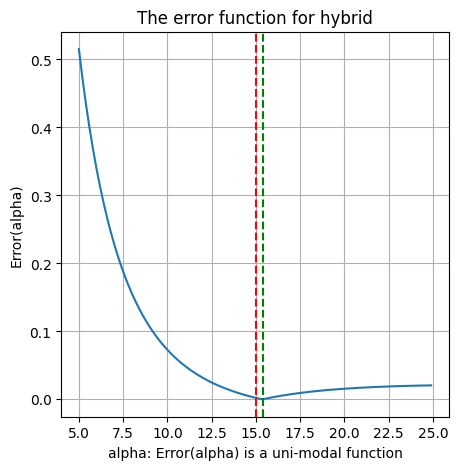

In [ ]:
test_alpha = 15       # the real value of the parameter
n = 5000              # the number of observations
gran_of_choice = 0.1  # the distance between the adjacent points in the search space
input_data = []       # if input_data = sample then the function 
                         # single_sample_and_estimate estimates the parameter 
                         # based on the observations
                      # if input_data is empty, then the sample will be generated 
                         # and its parameter will be estimated
verbose = 1           # if verbose == 1, then details will be written out and visualized in the graph
alpha_straighforward = single_sample_and_estimate(test_alpha, n, gran_of_choice, input_data, verbose)

In [ ]:
# This cell can be used for estimating the parameter from a given sample
test_alpha = 35       # the real value of the parameter
N = 1000              # the number of observations
gran_of_choice = 0.1  # the distance between the adjacent points in the search space
input_data = []       # if input_data = sample then the function 
                        # single_sample_and_estimate estimates the parameter 
                        # based on the observations
                      # if input_data is empty, then the sample will be generated 
                        # and its parameter will be estimated
verbose = 0           # if verbose == 1, then details will be written out and visualized in the graph

CHOICE1 = 'NIG'  # can try another family of distributions. E.g. 
                 # 'NIG', 'Nctr_chi_sqr', 'gamma', 'normal_sigma', 'laplace_scale', 'gumbel_scale'
CHOICE1 = choice 


if CHOICE1 in remaining_parameters.keys():
  if CHOICE1 in generate_MGF.keys():
    x = generate_samples_MGF[CHOICE1](test_alpha, remaining_parameters[CHOICE1], N)
  else:
    x = generate_samples_CF[CHOICE1](test_alpha, remaining_parameters[CHOICE1], N)
else:
  if choice in generate_MGF.keys(): 
    x = generate_samples_MGF[CHOICE1](test_alpha, N)
  else:
    x = generate_samples_CF[CHOICE1](test_alpha, N)

alpha_straighforward = single_sample_and_estimate(test_alpha, N, gran_of_choice, input_data, verbose)

print('for test alpha = '+str(test_alpha)+' the estimation from the sample is '+truncate_string(alpha_straighforward))

for test alpha = 35 the estimation from the sample is 35.700


**Projection vector**

Let us remind the definition of the MLP estimate:
$$\hat{\alpha}_{MLP}=\mathrm{agrmin}_{\alpha}\left| \left( (A(\alpha))^{-1}\cdot b(\alpha) \right)^{\top} \frac{1}{n}\sum_{m=1}^{n}F(\mathbf{T}, X_m) \right|$$

The projection vector $\mathrm{projection}(\alpha)$ is defined as follows:

$$\mathrm{projection}(\alpha) = (A(\alpha))^{-1}\cdot b(\alpha).$$

In other words:
$$\mathrm{dim}\left( \frac{1}{n}\sum_{m=1}^{n}F(\mathbf{T}, X_m) \right)= \mathrm{dim}\left( \mathrm{projection}(\alpha) \right),$$

and the same projection vector can be used for different samples of observations. The most computationally expensive operation is inverting the matrix $A(\alpha)$, and this operation should not repeated if the value is already calculated. 

This is why it makes sense to calculate **projection_vectors_dictionary** for many values of $\alpha$ and use them in calculations. This dictionary enabled us to significanly accelerate calculations.

In [ ]:
# This function computes the dictionary of the projection vectors for all the considered values of alpha
# This dictionary can be used in the future calls of the functions that estimate parameters for other observations
"In this function all possible values of test_alpha are in the interval [10, 60]"
def single_sample_and_estimate_robust_testing(test_alphas, n, gran_of_choice, number_of_samples, steps):
    start_alpha = 10
    end_alpha = 60
    
    alpha = list(np.arange(start_alpha, end_alpha, gran_of_choice))
    Fisher_Information = []
    projection_vector_dictionary = {}
    fi_dictionary = {}
    if choice in generate_MGF.keys():
      t = generate_T_params_MGF[choice]
    else:
      t = generate_T_params_CF[choice]


    for al in alpha:
        set_of_vectors = []
        set_of_fi_s = []
        for j in range(int(steps)):
            try:
                if j == 0:
                    rand_num = 0
                else:
                    rand_num = np.random.uniform(-0.005, 0.005)
                set_of_vectors.append(projection_vector(al + rand_num, t))
                set_of_fi_s.append(fi_2(al + rand_num, t))
            except:
                pass
        projection_vector_dictionary.update({al: set_of_vectors})
        fi_dictionary.update({al: np.median(set_of_fi_s)})
    print('All inverts are calculated')

    avg_vect = []
    std_vect = []
    for test_alpha in test_alphas:
        if choice in generate_MGF.keys():
            t = generate_T_params_MGF[choice]
        else:
            t = generate_T_params_CF[choice]
        try:
            Fisher_Information.append(  fisher_info(t, test_alpha)  )
        except:
            Fisher_Information.append(  1.01  )        
        alpha_estimates = []
        for _ in range(number_of_samples):
            if choice in remaining_parameters.keys(): 
              if choice in generate_MGF.keys():
                x = generate_samples_MGF[choice](test_alpha, remaining_parameters[choice], n)
                t = generate_T_params_MGF[choice]
              else:
                x = generate_samples_CF[choice](test_alpha, remaining_parameters[choice], n)
                t = generate_T_params_CF[choice]
            else:
              if choice in generate_MGF.keys(): 
                x = generate_samples_MGF[choice](test_alpha, n)
                t = generate_T_params_MGF[choice]
              else:
                x = generate_samples_CF[choice](test_alpha, n)
                t = generate_T_params_CF[choice]
            estimates = []
            fx = F(x, t)
            crit = []
            for al in alpha:
                set_of_vectors = projection_vector_dictionary[al]
                yy = []
                for vct in set_of_vectors:
                    try:
                        y1 = abs(np.dot(vct, fx))
                        yy.append(y1)
                    except:
                        pass
                y = np.median(yy)
                crit.append(y)

            argmin = np.argmin(crit)
            alpha_straightforward = alpha[argmin]
            alpha_estimates.append(alpha_straightforward)
        print('for test alpha = ' + str(test_alpha) + ' the avg est = ' +
              truncate_string(np.mean(alpha_estimates)) + ', the STD is ' +
              truncate_string(np.std(alpha_estimates)))
        avg_vect.append(np.mean(alpha_estimates))
        std_vect.append(np.std(alpha_estimates))
    return avg_vect, std_vect, projection_vector_dictionary, np.sqrt(n)*np.array(std_vect), np.array(Fisher_Information), fi_dictionary  

In [ ]:
# This function estimates the parameters, but it requires the dictionary of projection vectors
def single_sample_and_estimate_robust_testing_dictionary(test_alphas, n, gran_of_choice, number_of_samples, steps, projection_vector_dictionary):
    start_alpha = 10 
    end_alpha = 60
    alpha = list(np.arange(start_alpha, end_alpha, gran_of_choice))
    Fisher_Information = []

    avg_vect = []
    std_vect = []
    for test_alpha in test_alphas:
        if choice in generate_MGF.keys():
            t = generate_T_params_MGF[choice]
        else:
            t = generate_T_params_CF[choice]
        try:
            Fisher_Information.append(  fisher_info(t, test_alpha)  )
        except:
            Fisher_Information.append(  1.01  )  
        alpha_estimates = []
        for _ in range(number_of_samples):

            if choice in remaining_parameters.keys(): #['NIG', 'normal_sigma', 'laplace_scale', 'gumbel_scale']:
              if choice in generate_MGF.keys():
                x = generate_samples_MGF[choice](test_alpha, remaining_parameters[choice], n)
                t = generate_T_params_MGF[choice]
              else:
                x = generate_samples_CF[choice](test_alpha, remaining_parameters[choice], n)
                t = generate_T_params_CF[choice]
            else:
              if choice in generate_MGF.keys(): 
                x = generate_samples_MGF[choice](test_alpha, n)
                t = generate_T_params_MGF[choice]
              else:
                x = generate_samples_CF[choice](test_alpha, n)
                t = generate_T_params_CF[choice]


            fx = F(x, t)
            crit = []
            for al in alpha:
                set_of_vectors = projection_vector_dictionary[al]
                yy = []
                for vct in set_of_vectors:
                    try:
                      y1 = abs(np.dot(vct, fx))
                      yy.append(y1)
                    except:
                      pass
                y = np.median(yy)
                crit.append(y)

            argmin = np.argmin(crit) 
            alpha_straighforward = alpha[argmin]
            alpha_estimates.append(alpha_straighforward)
        print('for test alpha = '+str(test_alpha)+' the avg est = '+truncate_string(np.mean(alpha_estimates))+', the STD is '+truncate_string(np.std(alpha_estimates)))
        avg_vect.append(np.mean(alpha_estimates))
        std_vect.append(np.std(alpha_estimates))
    return avg_vect, std_vect, np.sqrt(n)*np.array(std_vect), np.array(Fisher_Information)

In [ ]:
"""The function for visualizing of the estimates of the parameter of interest, 
and their mean +/- 3*sigma intervals:""" 
def visualize_mu_plus_minus_3_sigma_and_fisher_info(N, avg_vect100, std_vect100, scaled_std_100, fisher_information_100, choice):
    if choice in generate_MGF.keys():
       coef = 1
    else:
       coef = 1/2
    MEAN = np.array(avg_vect100)
    STD  = np.array(std_vect100)
    upper_line = np.array(MEAN) + 3*np.array(STD)
    lower_line = np.array(MEAN) - 3*np.array(STD) 

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7))

    ax1.plot(Test_Values, MEAN, 'g-o')
    ax1.plot(Test_Values, upper_line, 'b')
    ax1.plot(Test_Values, lower_line, 'r')
    ax1.plot(Test_Values, Test_Values, 'k')
    ax1.fill_between(Test_Values, upper_line, lower_line, color='gray', alpha=0.5)
    ax1.grid()
    ax1.set_xlabel(r'$\alpha$')
    ax1.set_ylabel(r'$\alpha\_estimates$')
    ax1.set_title(r' $\mu \pm 3 \sigma$ intervals for N = ' + str(N)+'. '+choice)
    ax1.legend(['$\mu$,  $\mu = avg(alpha\_sample)$','$ \mu + 3*\sigma$, \
    $\sigma = std(alpha\_sample)$', '$\mu - 3*\sigma$',  'real_alpha'])

    ax2.plot(Test_Values,  scaled_std_100, 'g-o')
    ax2.plot(Test_Values,  np.sqrt(coef*fisher_information_100**-1))
    ax2.legend([r'$\sqrt{N}*STD(\alpha)$', r'$1/\sqrt{Fisher\_Info(\alpha)}$'])
    ax2.set_xlabel(r'$\alpha$')
    ax2.set_title(r'Convergence of $\sqrt{N}*STD$ to $1/\sqrt{Fisher\_Info(\alpha)}$')
    ax2.grid()
    ax2.set_ylim([0, min(1.2*max(scaled_std_100),1.2*max(np.sqrt(fisher_information_100**-1)))])
    plt.suptitle(f'Convergence for N = {N}', fontsize=16, fontweight='bold')



In [ ]:
"""The function for visualizing of the estimates of the parameter of interest, 
and their mean +/- 3*sigma intervals:""" 
def visualize_mu_plus_minus_3_sigma_and_fisher_info2(N, avg_vect100, std_vect100, scaled_std_100, fi, choice):
    if choice in generate_MGF.keys():
       coef = 1
    else:
       coef = 1/2

    KEY = fi.keys()
    Vals = []
    for k in KEY:
        Vals.append(np.sqrt(float(fi[k]))**(-1))    

    MEAN = np.array(avg_vect100)
    STD  = np.array(std_vect100)
    upper_line = np.array(MEAN) + 3*np.array(STD)
    lower_line = np.array(MEAN) - 3*np.array(STD) 

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7))

    ax1.plot(Test_Values, MEAN, 'g-o')
    ax1.plot(Test_Values, upper_line, 'b')
    ax1.plot(Test_Values, lower_line, 'r')
    ax1.plot(Test_Values, Test_Values, 'k')
    ax1.fill_between(Test_Values, upper_line, lower_line, color='gray', alpha=0.5)
    ax1.grid()
    ax1.set_xlabel(r'$\alpha$')
    ax1.set_ylabel(r'$\alpha\_estimates$')
    ax1.set_title(r' $\mu \pm 3 \sigma$ intervals for N = ' + str(N)+'. '+choice)
    ax1.legend(['$\mu$,  $\mu = avg(alpha\_sample)$','$ \mu + 3*\sigma$, \
    $\sigma = std(alpha\_sample)$', '$\mu - 3*\sigma$',  'real_alpha'])

    #Vals *= float(np.sqrt(coef))
    Vals = np.array(Vals) * np.sqrt(coef)

    ax2.plot(Test_Values,  scaled_std_100, 'g-o')
    ax2.plot(KEY,  Vals)
    ax2.legend([r'$\sqrt{N}*STD(\alpha)$', r'$1/\sqrt{Fisher\_Info(\alpha)}$'])
    ax2.set_xlabel(r'$\alpha$')
    ax2.set_title(r'Convergence of $\sqrt{N}*STD$ to $1/\sqrt{Fisher\_Info(\alpha)}$')
    ax2.grid()
    ax2.set_ylim([0, min(1.2*max(scaled_std_100),1.2*max(Vals))])
    plt.suptitle(f'Convergence for N = {N}', fontsize=16, fontweight='bold')


In [ ]:
Test_Values = [12, 15, 20, 25, 30, 35, 40, 45, 50, 55]

In [ ]:
# Exploration of the consistency
n = 100             # the number of observations
gran = 0.1          # the granularity in search space
number_samples = 20 # the number of samples

avg_vect_100, std_vect_100, projection_vector_dictionary, scaled_std_100, fisher_information_100, fi = \
single_sample_and_estimate_robust_testing(Test_Values, n, gran, number_samples, 5)

All inverts are calculated
for test alpha = 12 the avg est = 12.440, the STD is 1.0837
for test alpha = 15 the avg est = 15.295, the STD is 1.4975
for test alpha = 20 the avg est = 20.650, the STD is 1.9307
for test alpha = 25 the avg est = 25.535, the STD is 2.3608
for test alpha = 30 the avg est = 30.020, the STD is 2.6880
for test alpha = 35 the avg est = 35.740, the STD is 3.6852
for test alpha = 40 the avg est = 39.835, the STD is 4.2767
for test alpha = 45 the avg est = 46.770, the STD is 3.5587
for test alpha = 50 the avg est = 50.540, the STD is 4.3905
for test alpha = 55 the avg est = 55.690, the STD is 3.8554


The following graphs demonstrate the consistency of the MLP method. The x-axis contains the real values of the parameters. The y-axis contains the estimates. If all the estimates lie on the line $y(x) = x$, indicating a perfect match between the estimates and the real values of the parameters. In reality, this is not the case, but we approach that ideal situation as we employ more observations.

In the following graphs the black line is real values of the parameters, the green line is the estimates; the blue and red lines are the $\mu \pm 3 \sigma $ intervals. The thinner the band, the better provided that the black line is inside the band.

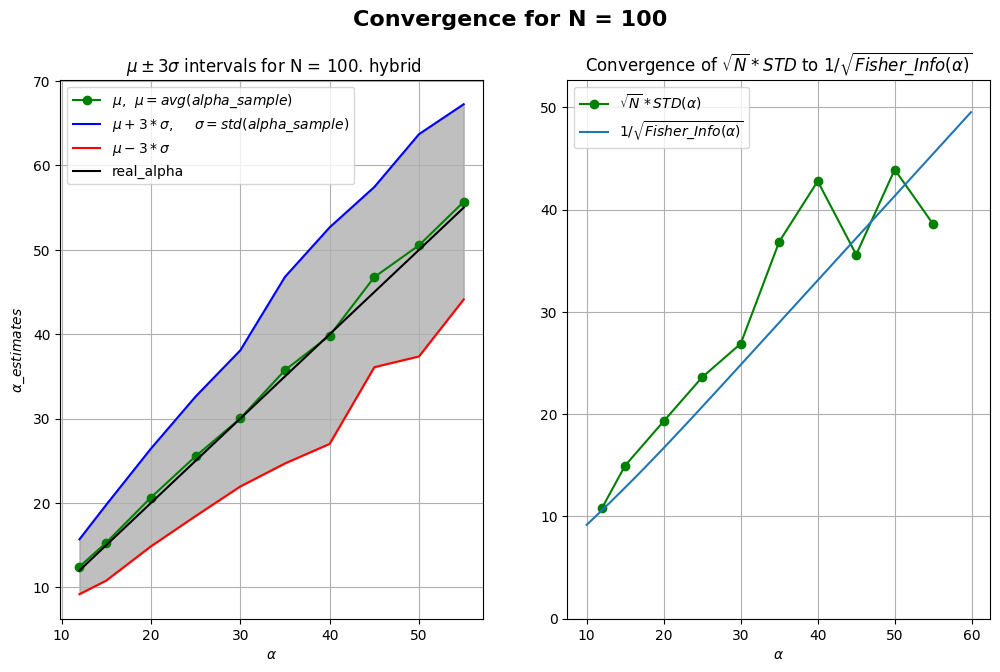

In [ ]:
N = 100
if choice in ['gumbel_scale', 'geom_stable_sigma', 'hybrid']:
   visualize_mu_plus_minus_3_sigma_and_fisher_info2(N, avg_vect_100, std_vect_100, scaled_std_100, fi, choice)
else:
   visualize_mu_plus_minus_3_sigma_and_fisher_info(N, avg_vect_100, std_vect_100, scaled_std_100, fisher_information_100, choice)

In [ ]:
n = 1000            # the number of observations
gran = 0.1          # the granularity in search space
number_samples = 20 # the number of samples

avg_vect_1000, std_vect_1000, scaled_std_1000, fisher_information_1000 = single_sample_and_estimate_robust_testing_dictionary(Test_Values, n, gran, number_samples, 5, projection_vector_dictionary)

for test alpha = 12 the avg est = 12.375, the STD is 0.3631
for test alpha = 15 the avg est = 15.310, the STD is 0.4504
for test alpha = 20 the avg est = 20.565, the STD is 0.6366
for test alpha = 25 the avg est = 25.790, the STD is 0.7556
for test alpha = 30 the avg est = 30.700, the STD is 0.9209
for test alpha = 35 the avg est = 35.990, the STD is 0.8532
for test alpha = 40 the avg est = 41.160, the STD is 0.9728
for test alpha = 45 the avg est = 45.935, the STD is 1.3051
for test alpha = 50 the avg est = 51.115, the STD is 1.4937
for test alpha = 55 the avg est = 56.640, the STD is 1.7682


In [ ]:
n = 10000           # the number of observations
gran = 0.1          # the granularity in search space
number_samples = 20 # the number of samples

avg_vect_10000, std_vect10000, scaled_std_10000, fisher_information_10000 = single_sample_and_estimate_robust_testing_dictionary(Test_Values, n, gran, number_samples, 5, projection_vector_dictionary)

for test alpha = 12 the avg est = 12.375, the STD is 0.0942
for test alpha = 15 the avg est = 15.385, the STD is 0.1526
for test alpha = 20 the avg est = 20.560, the STD is 0.2107
for test alpha = 25 the avg est = 25.625, the STD is 0.2118
for test alpha = 30 the avg est = 30.765, the STD is 0.3054
for test alpha = 35 the avg est = 35.860, the STD is 0.3955
for test alpha = 40 the avg est = 41.065, the STD is 0.3953
for test alpha = 45 the avg est = 46.040, the STD is 0.4176
for test alpha = 50 the avg est = 51.260, the STD is 0.3747
for test alpha = 55 the avg est = 56.440, the STD is 0.3747


In [ ]:
n = 100000          # the number of observations
gran = 0.1          # the granularity in search space
number_samples = 20 # the number of samples

avg_vect_100000, std_vect_100000, scaled_std_100000, fisher_information_100000 = single_sample_and_estimate_robust_testing_dictionary(Test_Values, n, gran, number_samples, 5, projection_vector_dictionary)

for test alpha = 12 the avg est = 12.405, the STD is 0.0384
for test alpha = 15 the avg est = 15.425, the STD is 0.0536
for test alpha = 20 the avg est = 20.485, the STD is 0.0572
for test alpha = 25 the avg est = 25.580, the STD is 0.0748
for test alpha = 30 the avg est = 30.685, the STD is 0.0963
for test alpha = 35 the avg est = 35.845, the STD is 0.0805
for test alpha = 40 the avg est = 40.920, the STD is 0.1208
for test alpha = 45 the avg est = 46.030, the STD is 0.1187
for test alpha = 50 the avg est = 51.185, the STD is 0.1108
for test alpha = 55 the avg est = 56.310, the STD is 0.1972


In [ ]:
if choice not in ['Nctr_chi_sqr', 'gumbel_scale', 'hybrid']:
   n = 1000000          # the number of observations
   gran = 0.1          # the granularity in search space
   number_samples = 20 # the number of samples
   avg_vect_million, std_vect_million, scaled_std_million, fisher_information_million = single_sample_and_estimate_robust_testing_dictionary(Test_Values, n, gran, number_samples, 5, projection_vector_dictionary)

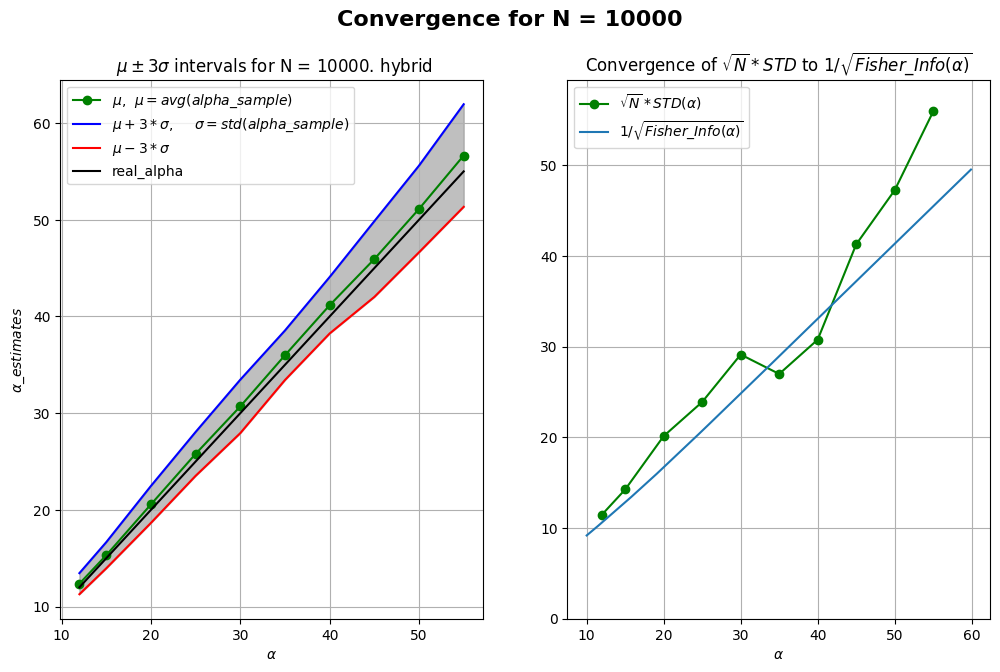

In [ ]:
N = 1000

if choice in ['gumbel_scale', 'geom_stable_sigma', 'hybrid']:
   visualize_mu_plus_minus_3_sigma_and_fisher_info2(N, avg_vect_1000, std_vect_1000, scaled_std_1000, fi, choice)
else:
   visualize_mu_plus_minus_3_sigma_and_fisher_info(N, avg_vect_1000, std_vect_1000, scaled_std_1000, fisher_information_1000, choice)

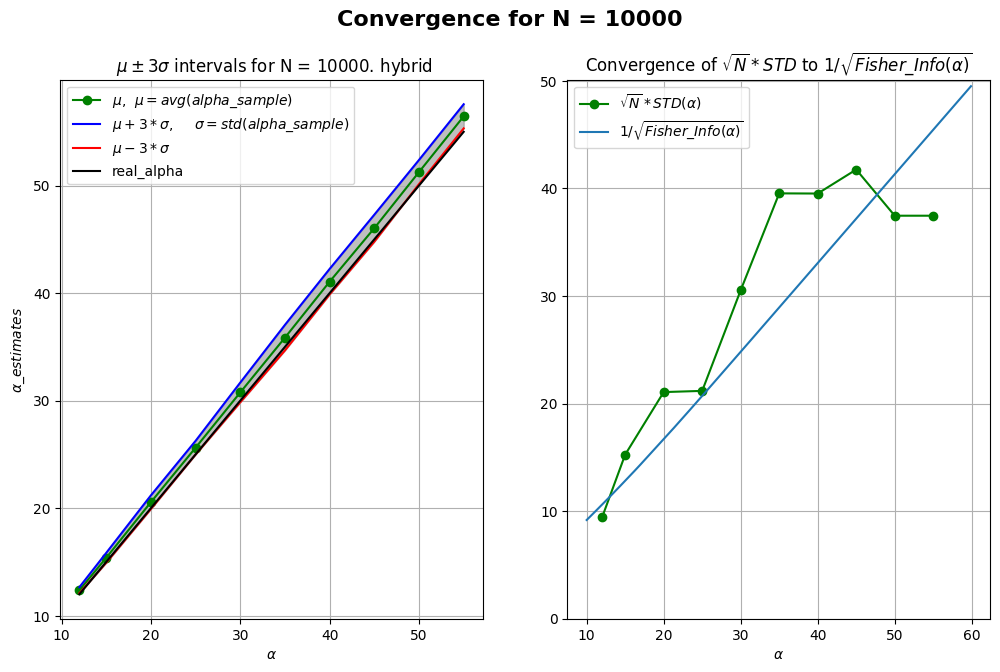

In [ ]:
N = 10000

if choice in ['gumbel_scale', 'geom_stable_sigma', 'hybrid']:
   visualize_mu_plus_minus_3_sigma_and_fisher_info2(N, avg_vect_10000, std_vect10000, scaled_std_10000, fi, choice)
else:
   visualize_mu_plus_minus_3_sigma_and_fisher_info(N, avg_vect_10000, std_vect10000, scaled_std_10000, fisher_information_10000, choice)

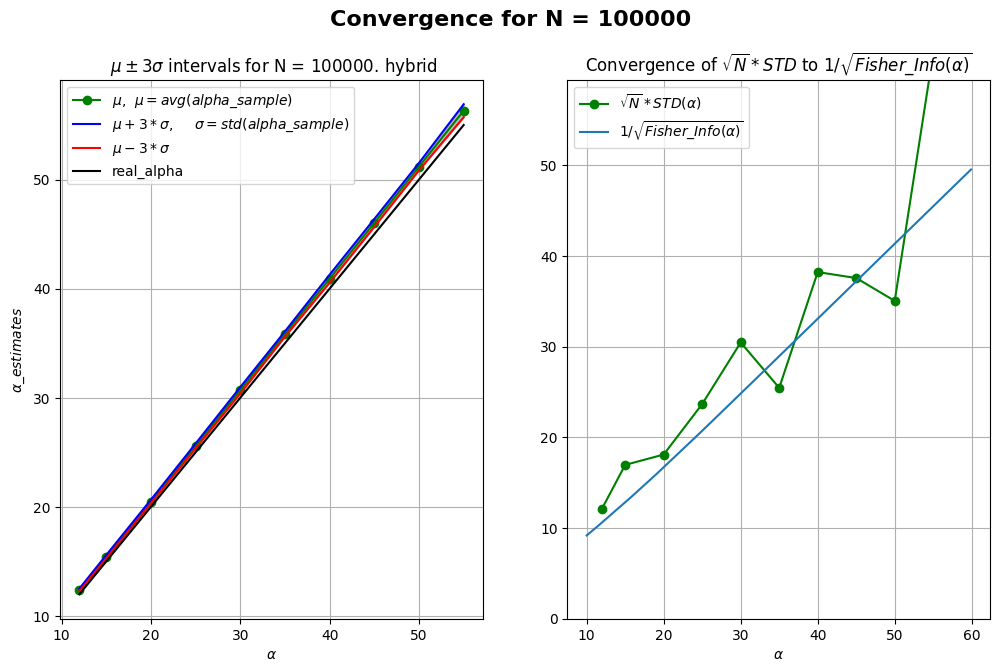

In [ ]:
N = 100000

if choice in ['gumbel_scale', 'geom_stable_sigma', 'hybrid']:
   visualize_mu_plus_minus_3_sigma_and_fisher_info2(N, avg_vect_100000, std_vect_100000, scaled_std_100000, fi, choice)
else:
   visualize_mu_plus_minus_3_sigma_and_fisher_info(N, avg_vect_100000, std_vect_100000, scaled_std_100000, fisher_information_100000, choice)

#visualize_mu_plus_minus_3_sigma_and_fisher_info(N, avg_vect_100000, std_vect_100000, scaled_std_100000, fisher_information_100000, choice)

In [ ]:
if choice not in ['Nctr_chi_sqr', 'gumbel_scale', 'hybrid']:
    N = 1000000
    #visualize_mu_plus_minus_3_sigma_and_fisher_info(N, avg_vect_million, std_vect_million, scaled_std_million, fisher_information_million, choice)
    if choice in ['gumbel_scale', 'geom_stable_sigma', 'hybrid']:
        visualize_mu_plus_minus_3_sigma_and_fisher_info2(N, avg_vect_million, std_vect_million, scaled_std_million, fi, choice)
    else:
        visualize_mu_plus_minus_3_sigma_and_fisher_info(N, avg_vect_million, std_vect_million, scaled_std_million, fisher_information_million, choice)

In [ ]:
Test_Parameters = Test_Values

In [ ]:
if choice not in ['Nctr_chi_sqr', 'gumbel_scale', 'hybrid']:
    print('The total abs deviation for '+choice+' is '+truncate_string( sum(abs(np.array(avg_vect_10000) - np.array(Test_Parameters)))+ \
                                                        sum(abs(np.array(avg_vect_100000) - np.array(Test_Parameters)))+ \
                                                      sum(abs(np.array(avg_vect_million) - np.array(Test_Parameters)))))
else:
    print('The total abs deviation for '+choice+' is '+truncate_string( sum(abs(np.array(avg_vect_10000) - np.array(Test_Parameters)))+ \
                                                        sum(abs(np.array(avg_vect_100000) - np.array(Test_Parameters)))))

The total abs deviation for hybrid is 16.245


Note that this piece of code has already calculated the **projection_vector_dictionary** which can be used for future samples.

**Issues related to the speed and precision**

In this report, the vector T was not optimized: instead a random search was employed and when the results seemed more or less reasonable, then that T vector was set. 

This code is fast except for three families of distributions: non-centrical chi-squared, gamma, and hybrid therefore, the estimation of the parameters of samples with millions of observations is skipped. Whatever distribbution the user would choose, the run should not exceed 7 minutes.

For the non-centrical chi-squared distribution, the estimation looks good, until the real parameter exceeds 50. This issue should be solved by a better setting of the T vector. 

The error functions can be jumpy (according to our observations) for the normal inverse Gaussian, non-centrical chi-squared, Laplace, Gumbel, and gamma distribitions. 

# **Conclusion**

This report is a preparation for a paper about this topic which will cover the estimation of the parameters and practical applications. This method is robust and has big potential for many applications.

The corresponding code can be used for generating projection_vector_dictionaries and for the determination of the best vectors T, e.g. using the total abs deviation as the criterion.

# **Appendix**

Calculation of the Fisher information if your choice is the normal distribution. 

Since the $\sigma$ parameter of $N(0, \sigma^2)$ estimated, the Fisher information is computed as follows:
$$I(\sigma) = \frac{2}{\sigma^2}.$$

We can assess the the quality of the estimation of the Fisher Information by the formula:
$$I_{MLP}(\sigma)=\left( {\left(A(\sigma)\right)}^{-1} b(\sigma) \right)\cdot b(\sigma).$$

The following code visualizes the both $I(\sigma)$ and $I_{MLP}(\sigma)$.


In [ ]:
FI_mlp = []
FI     = []
Test_Parameters = np.linspace(20, 120, 50)
if choice == 'normal_sigma':
   for a1 in Test_Parameters:
       FI_mlp.append(fisher_info(T, a1))
       FI.append(2/a1**2)

   fig = plt.figure(figsize=(10, 10))
   plt.plot(Test_Parameters, FI_mlp)
   plt.plot(Test_Parameters, FI)
   plt.xlabel('sigma')
   plt.ylabel('fisher_info(sigma)')
   plt.grid()
   plt.title('Fisher information')
   plt.legend(['fisher_info_MLP', 'real_fisher_info'])
   plt.show()